In [1]:
from data import btc_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from modelo import prediccion, set_entrenamiento, set_validacion, modelo, sc

In [2]:
btc_data.head()

,Open,High,Low,Close
Date,,,,
2013-04-30,135.30,141.96,135.30,135.30
2013-05-03,117.00,117.00,91.01,91.01
2013-05-07,111.25,118.33,106.40,106.40
2013-05-11,112.64,118.78,112.64,113.01
2013-05-15,114.71,117.18,114.16,114.16


In [3]:
btc_data.tail()

,Open,High,Low,Close,date
Date,,,,,
2024-02-27,50841.0,54478.0,50841.0,54478.0,2024-02-27
2024-02-29,57004.0,62559.0,57004.0,62559.0,2024-02-29
2024-03-03,61298.0,62427.0,61298.0,62068.0,2024-03-03
2024-03-07,63053.0,68187.0,63053.0,66146.0,2024-03-07
2024-03-11,66945.0,68508.0,66945.0,68508.0,2024-03-11


In [4]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2013-04-30 to 2024-03-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    1036 non-null   float64       
 1   High    1036 non-null   float64       
 2   Low     1036 non-null   float64       
 3   Close   1036 non-null   float64       
 4   date    1036 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.6 KB


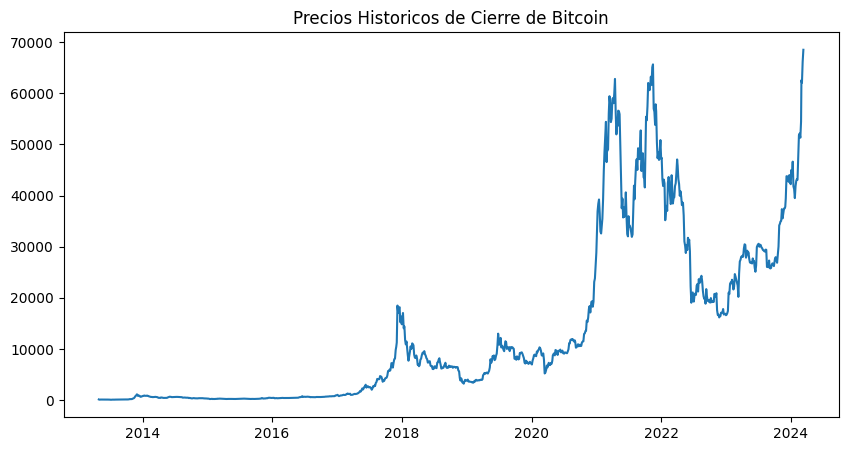

In [6]:
plt.figure(figsize=(10,5))
plt.plot(btc_data["Close"])
plt.title("Precios Historicos de Cierre de Bitcoin")
plt.show()

In [8]:
mms30 = pd.DataFrame()
mms30["Close"] = btc_data["Close"].rolling(window=30).mean()

In [10]:
mms100 = pd.DataFrame()
mms100["Close"] = btc_data["Close"].rolling(window=100).mean()

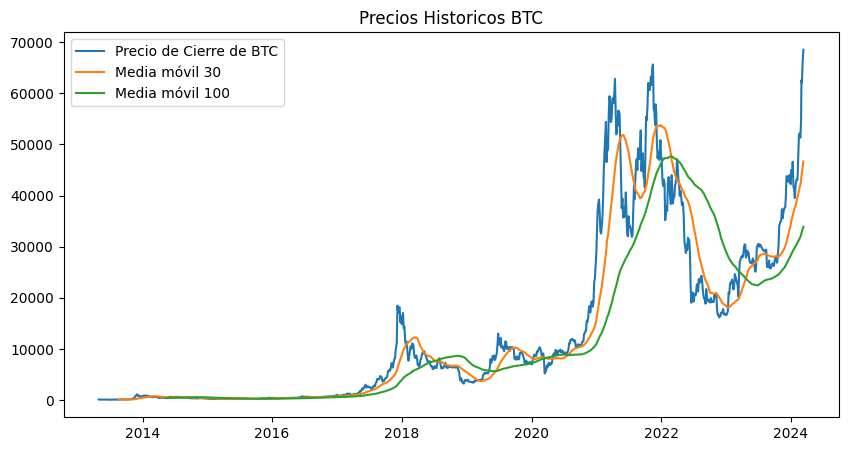

In [11]:
plt.figure(figsize=(10,5))
plt.plot(btc_data["Close"], label = "Precio de Cierre de BTC")
plt.plot(mms30["Close"], label = "Media móvil 30")
plt.plot(mms100["Close"], label = "Media móvil 100")
plt.title("Precios Historicos BTC")
plt.legend(loc= "upper left")
plt.show()

In [12]:
data = pd.DataFrame()
data["BTC"] = btc_data["Close"]
data["MMS30"] = mms30["Close"]
data["MMS100"] = mms100["Close"]

In [13]:
def alertas(data):
    compra = []
    venta = []
    condicion = 0

    for dia in range(len(data)):
        
        if data["MMS30"][dia] > data["MMS100"][dia]:
            if condicion != 1:
                compra.append(data["BTC"][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)

        elif data["MMS30"][dia] < data["MMS100"][dia]:
            if condicion != -1:
                venta.append(data["BTC"][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        
        else:
            compra.append(np.nan)
            venta.append(np.nan)

    return (compra, venta)

In [14]:
alerta_compra_venta = alertas(data)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8792\3620521609.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data["MMS30"][dia] > data["MMS100"][dia]:
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8792\3620521609.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data["MMS30"][dia] < data["MMS100"][dia]:
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8792\3620521609.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

In [16]:
data["Compra"] = alerta_compra_venta[0]
data["Venta"] = alerta_compra_venta[1]

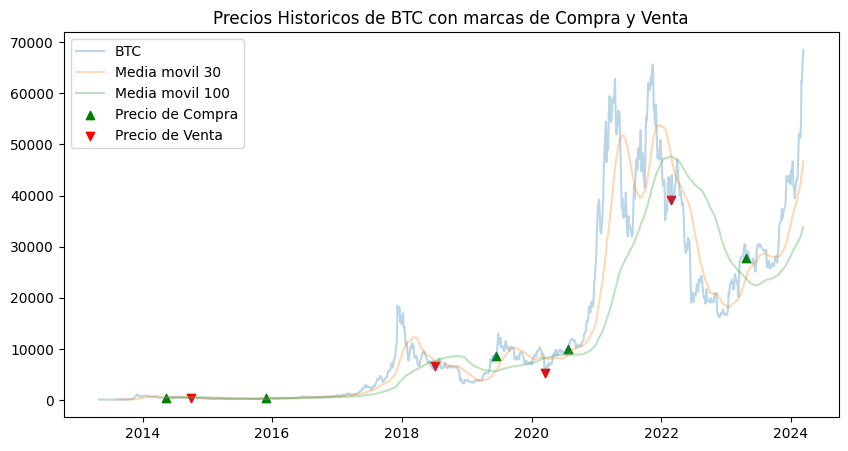

In [17]:
plt.figure(figsize= (10, 5))
plt.plot(data["BTC"], label = "BTC", alpha = 0.3)
plt.plot(data["MMS30"], label = "Media movil 30", alpha = 0.3)
plt.plot(data["MMS100"], label = "Media movil 100", alpha = 0.3)
plt.scatter(data.index, data["Compra"], label = "Precio de Compra", marker ="^", color = "green")
plt.scatter(data.index, data["Venta"], label = "Precio de Venta", marker ="v", color = "red")
plt.title("Precios Historicos de BTC con marcas de Compra y Venta")
plt.legend(loc = "upper left")
plt.show()


Comparación de datos reales vs predicciones, utilizando 50 neuronas.

In [83]:
from modelo import set_validacion, prediccion

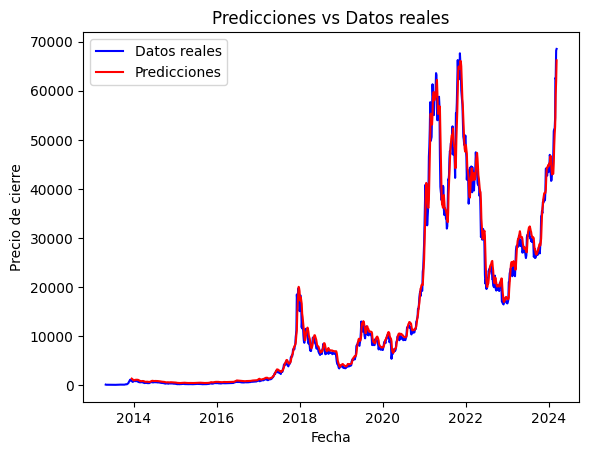

In [84]:
## Datos reales
plt.plot(set_validacion.index, set_validacion.values, color='blue', label='Datos reales')

## Predicciones
plt.plot(set_validacion.index[60:], prediccion, color='red', label='Predicciones')

plt.title('Predicciones vs Datos reales')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()